# Harry Potter Sentiment Analysis

In [96]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [73]:
plt.style.use('ggplot')

In [66]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Cargando data

In [21]:
df_HP_Amazon = pd.read_excel('Amazon HP.xlsx')
df_HP_Amazon.head()

,Amazon_Username,Amazon_Stars,Amazon_Title,Amazon_Date,Amazon_Review
0,Marouane,5,Magnificent book,16 de agosto de 2019,It was about time I started reading the HP boo...
1,Marouane,5,Magnificent book,16 de agosto de 2019,It was about time I started reading the HP boo...
2,Amanda Babcock,1,Do not buy it!!!! Zero stars if it was possible.,10 de octubre de 2018,Super mad! This book is not put together corre...
3,Chris,3,Much worse condition than advertised,18 de junio de 2021,"I purchased this as a used product, so let me ..."
4,I,1,Harry Potter and the Socerors Stone,13 de enero de 2020,The book was written on and not suitable as a ...


In [240]:
df_HP_Amazon.shape

(30, 5)

In [138]:
df_HP_RT= pd.read_excel('RottenTomatoes HP.xlsx')
df_HP_RT.head()

,Username,Review,ReviewDate,Score,PublicatedBy,Unnamed: 5
0,David Nusair,...a decent-enough first installment that admi...,"Nov 15, 2021",2.5/4,Reel Film Reviews,NaN
1,Kevin Maher,An exceptional big-screen half-term treat.,"Oct 29, 2021",4/5,Times (UK),NaN
2,Film Companion Staff,The Harry Potter movies are the rare series to...,"Oct 27, 2020",NaN,Film Companion,NaN
3,Mike Massie,It's always thrilling to see kids taking matte...,"Sep 29, 2020",8/10,Gone With The Twins,NaN
4,Leigh Paatsch,Does a magnificent job in bringing to life the...,"Jun 11, 2020",4/5,Herald Sun (Australia),NaN


In [241]:
df_HP_RT.shape

(120, 6)

## SentimentIntensityAnalyzer

### Primer review Amazon

In [77]:
analyzer = SentimentIntensityAnalyzer()

In [88]:
score_Amazon = analyzer.polarity_scores(df_HP_Amazon['Amazon_Review'][0])
print(score_Amazon)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


([<matplotlib.axis.XTick at 0x1efc183d700>,
 [Text(0, 0, 'neg'),
  Text(1, 0, 'neu'),
  Text(2, 0, 'pos'),
  Text(3, 0, 'compound')])

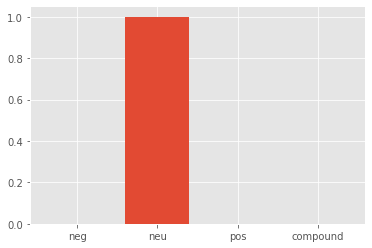

In [89]:
plt.bar(range(len(score_Amazon)), list(score_Amazon.values()), align='center')
plt.xticks(range(len(score_Amazon)), list(score_Amazon.keys()))

### Primer review Rotten Tomatoes

In [86]:
score_RT = analyzer.polarity_scores(df_HP_RT['Review'][0])
print(score_RT)

{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.7003}


([<matplotlib.axis.XTick at 0x1efc17d30a0>,
 [Text(0, 0, 'neg'),
  Text(1, 0, 'neu'),
  Text(2, 0, 'pos'),
  Text(3, 0, 'compound')])

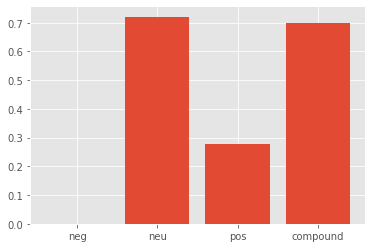

In [87]:
plt.bar(range(len(score_RT)), list(score_RT.values()), align='center')
plt.xticks(range(len(score_RT)), list(score_RT.keys()))

## Para todos los Reviews

### Amazon

In [251]:
result = {'positive': 0, 'negative': 0, 'neutral': 0}

In [252]:
sentiment_amaz = pd.DataFrame(columns=['Review','Sentiment'])

In [ ]:
for review in df_HP_Amazon['Amazon_Review']:
    score = analyzer.polarity_scores(review)
    if score['compound'] > 0.05:
        result['positive'] += 1
    elif score['compound'] < -0.05:
        result['negative'] += 1
    else:
        result['neutral'] += 1
    sentiment_amaz=sentiment_amaz.append({'Review': review, 'Sentiment': score['compound']},ignore_index=True)

In [254]:
print('Number of reviews labeled in each sentiment')
print(result)

Number of reviews labeled in each sentiment
{'positive': 23, 'negative': 4, 'neutral': 3}


In [255]:
objects = ('Positivo', 'Negativo', 'Neutral')
y_pos = np.arange(len(objects))
performance = [result['positive'],result['negative'],result['neutral']]

In [256]:
plt.rcParams["figure.figsize"] = (10, 7)

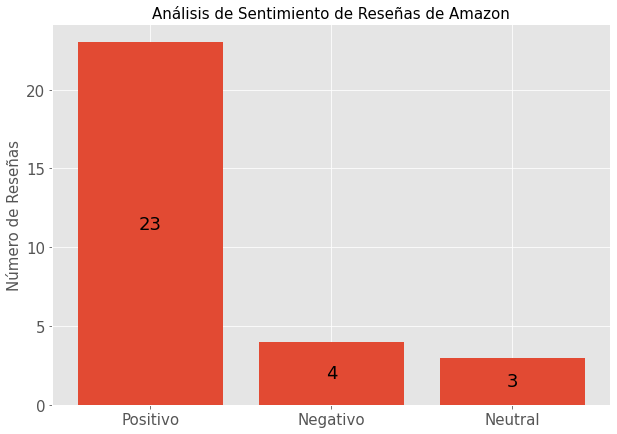

In [257]:
p1 = plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Número de Reseñas',fontsize=15)
plt.title('Análisis de Sentimiento de Reseñas de Amazon',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar_label(p1, label_type='center', fontsize=18)
plt.show()

In [259]:
sentiment_amaz.head()

,Review,Sentiment
0,It was about time I started reading the HP boo...,0.0
1,It was about time I started reading the HP boo...,0.0
2,Super mad! This book is not put together corre...,0.4993
3,"I purchased this as a used product, so let me ...",0.3029
4,The book was written on and not suitable as a ...,-0.3412


In [269]:
sentiment_amaz['Sentiment'].min()

-0.5719

In [268]:
sentiment_amaz['Sentiment'].max()

0.9795

In [261]:
sentiment_amaz['Sentiment'].mean().round(3)

0.528

### Rotten Tomatoes

In [242]:
df_HP_RT['Review'] = df_HP_RT['Review'].astype('str')

In [243]:
result = {'positive': 0, 'negative': 0, 'neutral': 0}

In [244]:
sentiment_rt = pd.DataFrame(columns=['Review','Sentiment'])

In [ ]:
for review in df_HP_RT['Review']:
    score = analyzer.polarity_scores(review)
    if score['compound'] > 0.05:
        result['positive'] += 1
    elif score['compound'] < -0.05:
        result['negative'] += 1
    else:
        result['neutral'] += 1
    sentiment_rt=sentiment_rt.append({'Review': review, 'Sentiment': score['compound']},ignore_index=True)

In [246]:
print('Number of reviews labeled in each sentiment')
print(result)

Number of reviews labeled in each sentiment
{'positive': 83, 'negative': 18, 'neutral': 19}


In [247]:
objects = ('Positivo', 'Negativo', 'Neutral')
y_pos = np.arange(len(objects))
performance = [result['positive'],result['negative'],result['neutral']]

In [248]:
plt.rcParams["figure.figsize"] = (10, 7)

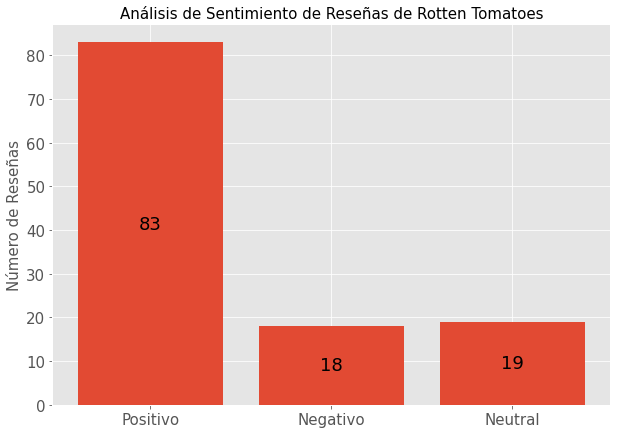

In [249]:
p1 = plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Número de Reseñas',fontsize=15)
plt.title('Análisis de Sentimiento de Reseñas de Rotten Tomatoes',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar_label(p1, label_type='center', fontsize=18)
plt.show()

In [264]:
sentiment_rt.head()

,Review,Sentiment
0,...a decent-enough first installment that admi...,0.7003
1,An exceptional big-screen half-term treat.,0.4019
2,The Harry Potter movies are the rare series to...,0.4404
3,It's always thrilling to see kids taking matte...,0.2263
4,Does a magnificent job in bringing to life the...,0.765


In [267]:
sentiment_rt['Sentiment'].min()

-0.765

In [266]:
sentiment_rt['Sentiment'].max()

0.9337

In [262]:
sentiment_rt['Sentiment'].mean().round(3)

0.339